In [10]:
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
import numpy as np
import os

from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [3]:
# Visualizing the data and their labels

# first set random state for consistency
np.random.seed(99)

# define a function to show an image with its label using its path in the folder
def plot_samp(letter):
    impath = './asl_alphabet_train/' + letter + '/**'
    plt.imshow(cv2.imread(glob(impath)[np.random.randint(low = 0, high = 2999)]))
    plt.title(letter)

In [4]:
# getting labels of training data from folder directory as a list

# setting the directory
train_dir = './asl_alphabet_train/'

# list of directory
train_folders = os.listdir(train_dir)

# taking out "ds.store"
tr_fold = train_folders[1:30]
tr_fold

['R',
 'U',
 'I',
 'N',
 'G',
 'Z',
 'T',
 'S',
 'A',
 'F',
 'O',
 'H',
 'del',
 'nothing',
 'space',
 'M',
 'J',
 'C',
 'D',
 'V',
 'Q',
 'X',
 'E',
 'B',
 'K',
 'L',
 'Y',
 'P',
 'W']

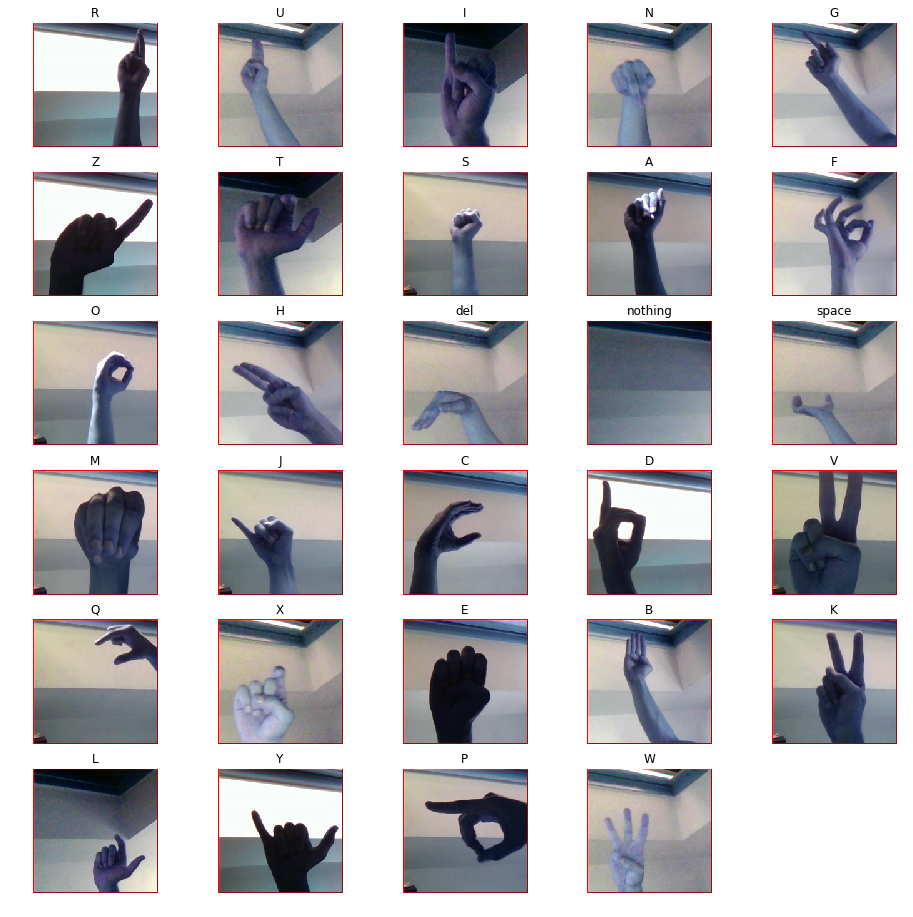

In [5]:
plt.figure(figsize = (16,16))

for i in range(len(tr_fold)):
    plt.subplot(6, 5, i + 1).axis('off')
    plot_samp(tr_fold[i])

In [15]:
data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split = .1)

train_gen = data_augmentor.flow_from_directory(train_dir, target_size = (64, 64),
                                                     batch_size = 64, shuffle=True, subset="training")
val_gen = data_augmentor.flow_from_directory(train_dir, target_size = (64, 64),
                                                   batch_size = 64, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [16]:
mod = Sequential()
mod.add(Conv2D(64, activation = 'relu', input_shape = (64,64, 3)))
mod.add(Dense(29, activation = 'softmax'))
mod.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
early_stop = EarlyStopping(patience = 2)
mod.fit_generator(train_gen, epochs = 20, validation_data = val_gen, callbacks = [early_stop])

Epoch 1/20


ValueError: Error when checking target: expected dense_5 to have 4 dimensions, but got array with shape (64, 29)